    # Automatic Jupyter Notebook for OpenML dataset 541: socmob

In [1]:
%matplotlib inline
from scripts.preamble import *
did = 541
data = oml.datasets.get_dataset(did)
X, y, features = data.get_data(target=data.default_target_attribute, return_attribute_names=True)
task, topList, strats, scores = getOpenMLData(did, data.default_target_attribute) 
topList[:10] 

No compatible runs found


""


In [2]:
from scripts.problemType import *
problemType = findProblemType(data) 
checkTask(task, problemType, data.default_target_attribute) 

Problem type: supervised regression problem.
Using correct task


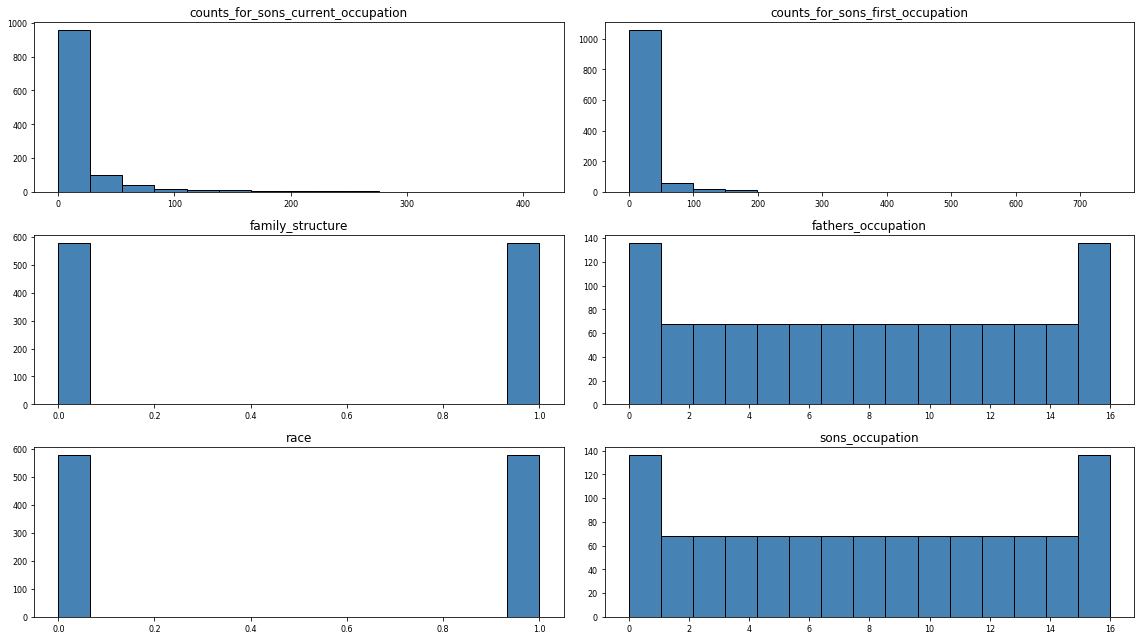

In [3]:
from scripts.dataVisualization import *
show1DHist(data) 

,fathers_occupation,sons_occupation,family_structure,race,counts_for_sons_first_occupation,outlier
271,5,4,0,1,746.3,-0.153813
1047,16,16,1,0,44.8,-0.145878
216,9,9,0,1,427.4,-0.129397
270,5,5,0,1,377.7,-0.123897
198,10,10,0,1,307.9,-0.115726
1049,16,9,1,0,38.4,-0.113901
18,11,11,0,1,338.6,-0.113801
464,16,0,1,1,40.7,-0.11208
35,8,11,0,1,293.2,-0.110969
288,4,4,0,1,239.3,-0.106251


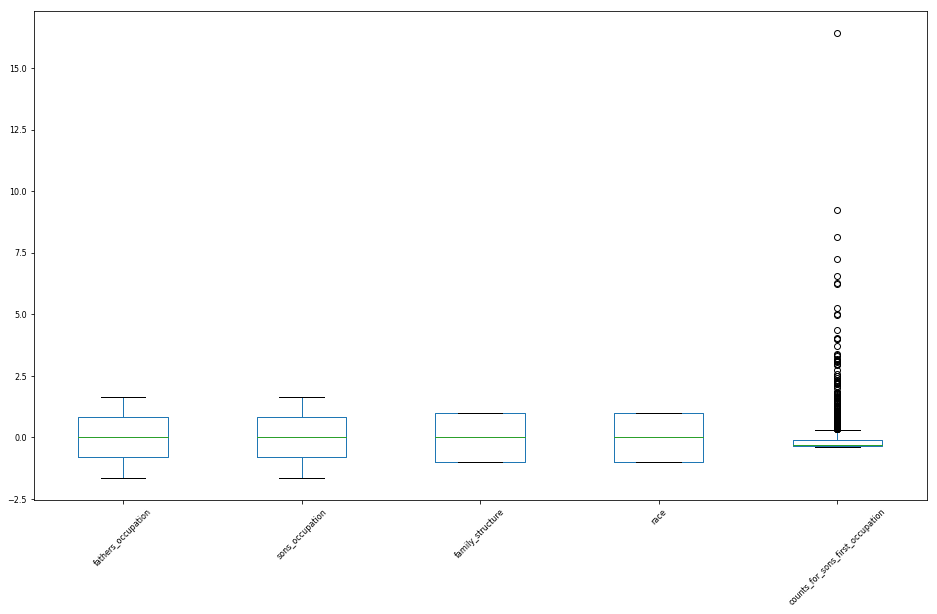

In [4]:
from scripts.outlierDetection import *
outlierDetection(X, features, 10) 

In [5]:
from scripts.localDataOpenMLInterface import *
showTopNSimilarDatasets("datasetSimilarityMatrixNormalized", did, 10) 

     did                  name  similarity                             url
0    531                boston       0.988    https://www.openml.org/d/531
1  41021             Moneyball       0.964  https://www.openml.org/d/41021
2   4137              Dorothea       0.682   https://www.openml.org/d/4137
3   1088  variousCancers_final       0.662   https://www.openml.org/d/1088
4   1086         ovarianTumour       0.647   https://www.openml.org/d/1086
5   1087            hepatitisC       0.647   https://www.openml.org/d/1087
6  41103                STL-10       0.624  https://www.openml.org/d/41103
7   1083             mouseType       0.614   https://www.openml.org/d/1083
8   4552     BachChoralHarmony       0.614   https://www.openml.org/d/4552
9   1084       BurkittLymphoma       0.612   https://www.openml.org/d/1084


Complexity threshold to determine if an algorithm will be run.


In [6]:
comp = 50000000000000

In [7]:
from scripts.featureImportance import *
featureImportance(data) 

ValueError: Unknown label type: 'continuous'

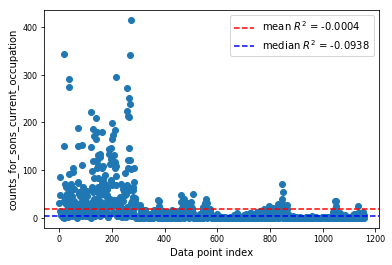

In [8]:
from scripts.baselines import *
maxBaseline = generateBaselines(data, problemType) 

Please run the full notebook then toggle removeOutliers and run this cell and the next to compare the algorithms with and without outliers. 

In [9]:
removeOutliers = False 

In [10]:
from scripts.machineLearningAlgorithms import *
strats = runMachineLearningAlgorithms(data, comp, strats, problemType, task, showRuntimePrediction=False, runTPOT=False, removeOutliers=removeOutliers)
plot_alg(data, strats, maxBaseline, problemType) 

c:\users\hugo\anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


TypeError: 'NoneType' object is not iterable

In [ ]:
from scripts.relativePerformance import * 
showRelativePerformanceBoxplot(scores, topList, strats, maxBaseline) 